<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/laboratory_exercise_2_introduction_to_data_science_12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These system help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006. Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. For more details visit https://archive.ics.uci.edu/dataset/161/mammographic+mass.

## The Mammographic Mass Dataset

## Downloading the Mammographic Mass Dataset

In [ ]:
!gdown 1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R
To: /content/mammographic-mass.csv
100% 13.3k/13.3k [00:00<00:00, 35.7MB/s]


## Exploring the Mammographic Mass Dataset
The Mammographic Mass dataset contains six attributes, among which there is a target attribute and a non-predictive attribute. The target attribute, denoted as 'Severity', is binomial, distinguishing between benign (0) and malignant (1) cases. The non-predictive attribute, 'BI-RADS assessment', is an ordinal scale ranging from 1 to 5. The remaining four attributes are predictive, including 'Age', represented in years as an integer, 'Shape' categorizing mass shape as round (1), oval (2), lobular (3), or irregular (4). 'Margin' classifies mass margins into circumscribed (1), microlobulated (2), obscured (3), ill-defined (4), or spiculated (5). 'Density' indicates mass density as high (1), iso (2), low (3), or fat-containing (4).

Load the dataset into a `pandas` data frame.

In [ ]:
data = pd.read_csv('/content/mammographic-mass.csv')

Drop the column `BI-RADS assessment` as it shouldn't be used for prediction.

In [ ]:
data.drop('BI-RADS assessment', axis=1, inplace=True)

In [ ]:
data.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


Explore the dataset using visualizations of your choice.

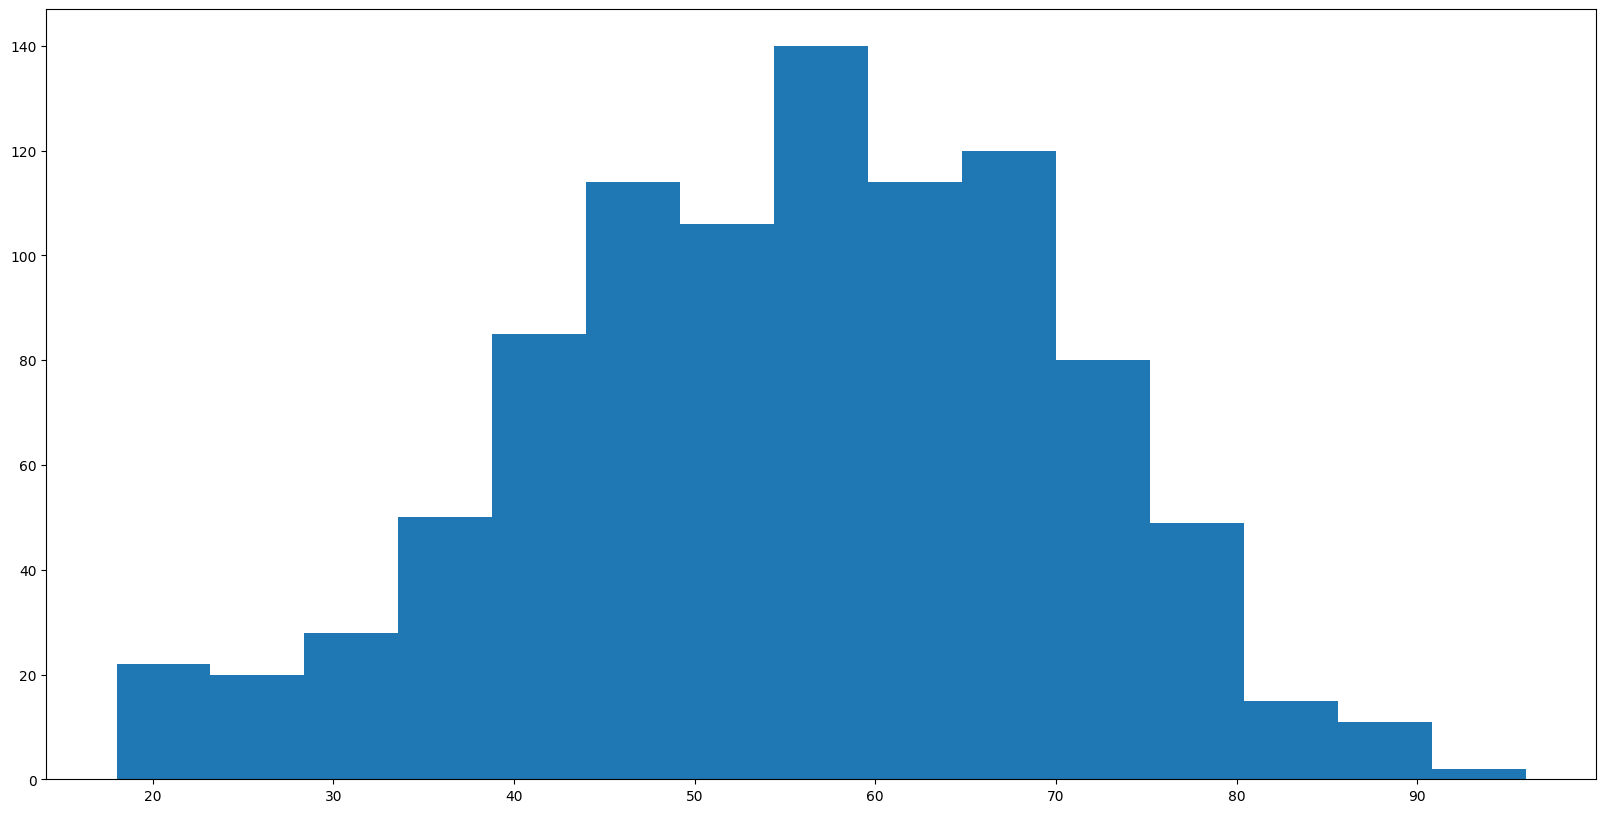

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(data['Age'], bins=15)
plt.show()

# Looks like a normal distribution. We will check for outliers

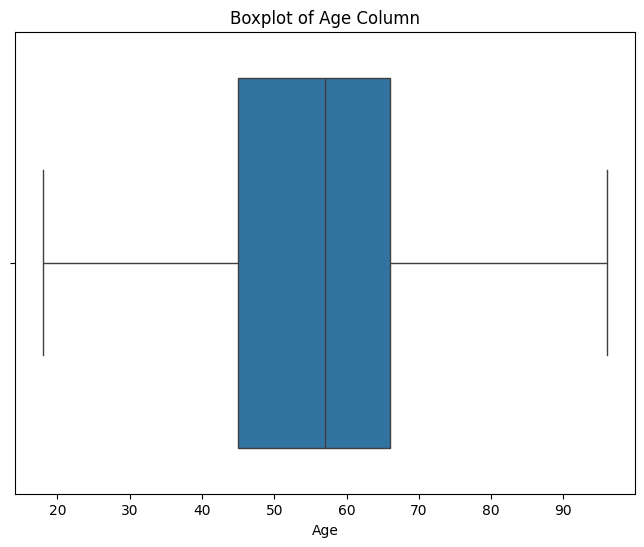

In [ ]:
# sns.boxplot(data=data, y='Age', hue='Age')
# plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title("Boxplot of Age Column")
plt.xlabel("Age")
plt.show()

In [ ]:
data.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


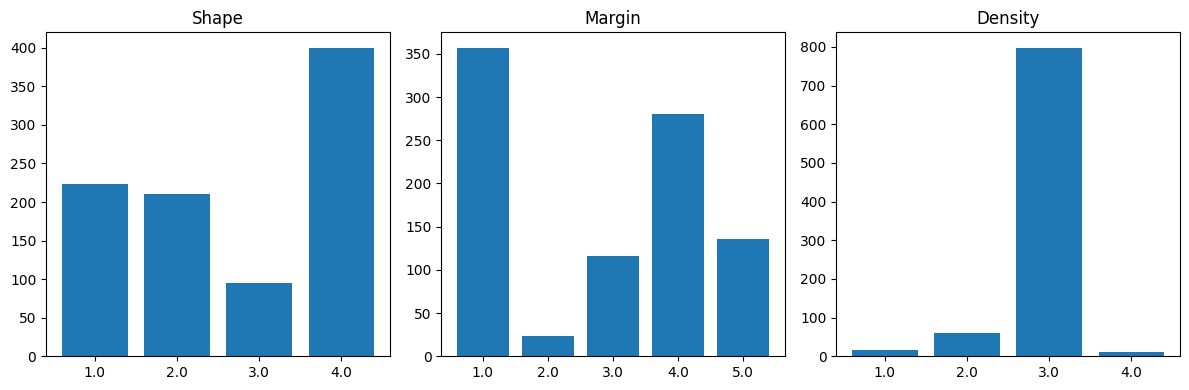

In [ ]:
cf = ['Shape', 'Margin', 'Density']
plt.figure(figsize=(12,4))

for i in range(len(cf)):
  plt.subplot(1,len(cf), i+1)
  cf_counts = data.groupby(cf[i]).size()
  plt.bar(cf_counts.index.astype(str), cf_counts)
  plt.title(cf[i])
plt.tight_layout()

Check if the dataset is balanced.

In [ ]:
data['Severity'].value_counts()
# The dataset is somewhat balanced.

,count
Severity,
0,516
1,445


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
data.isnull().mean() * 100

,0
Age,0.520291
Shape,3.225806
Margin,4.994797
Density,7.908429
Severity,0.000000


In [ ]:
data.dropna(subset=['Age'], axis=0, inplace=True)
data['Age'].isnull().sum()

0

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

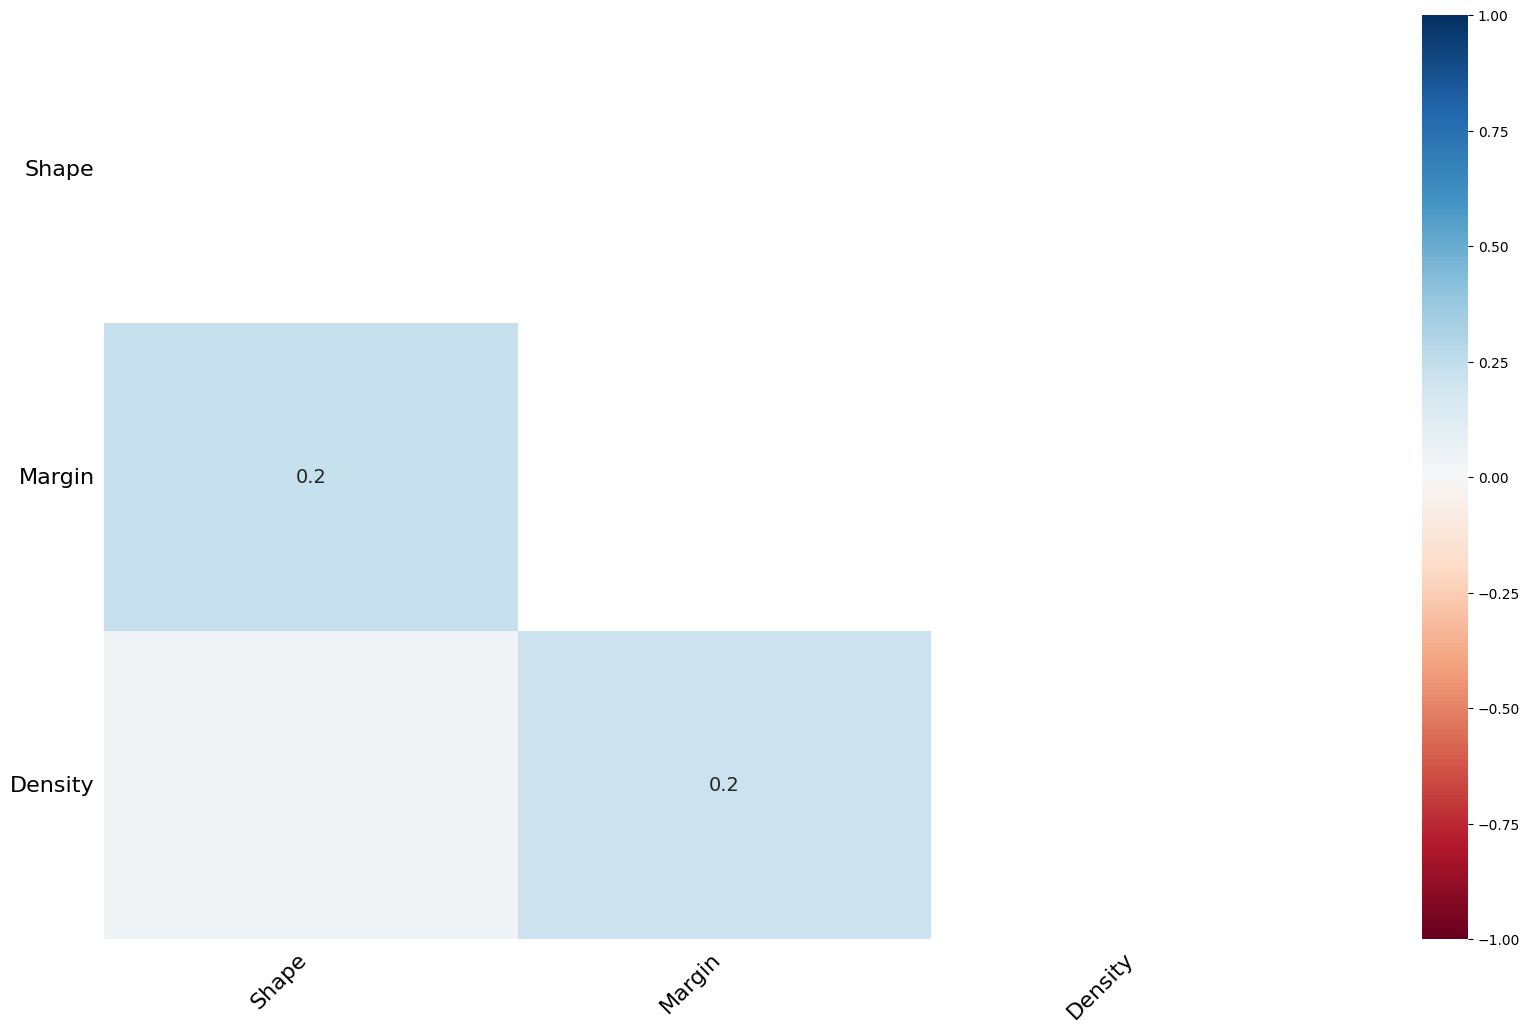

In [ ]:
msno.heatmap(data)
plt.show()

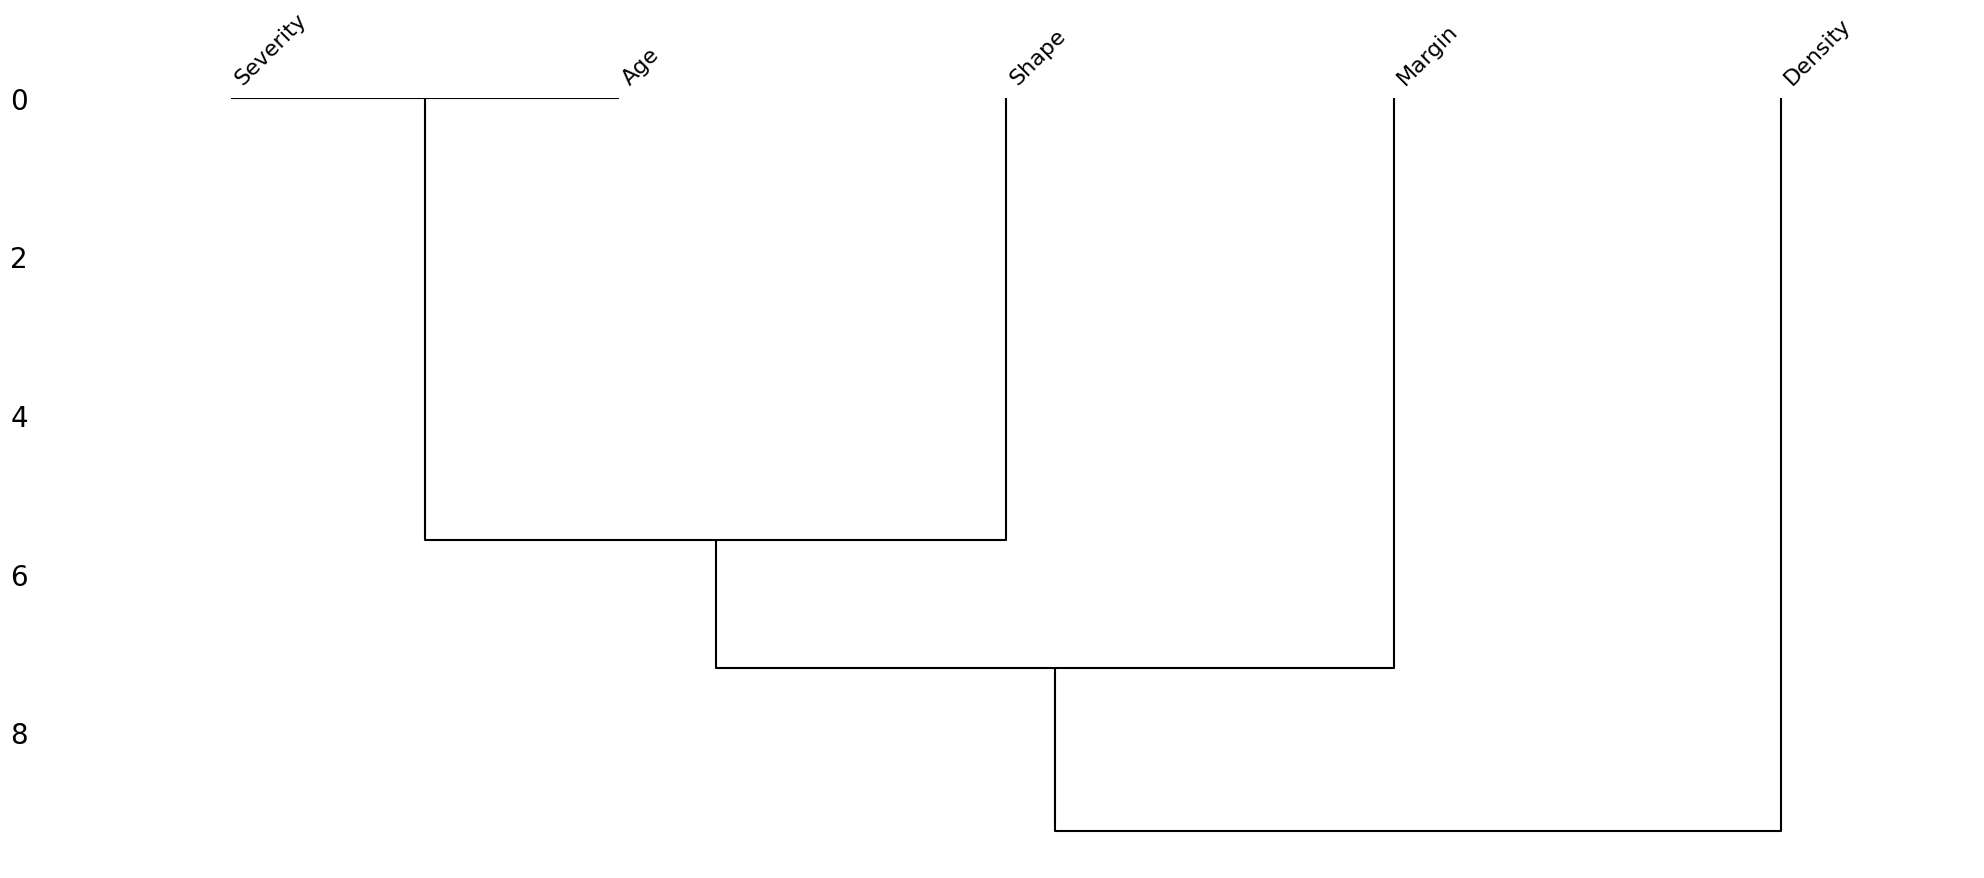

In [ ]:
msno.dendrogram(data)
plt.show()
# no correlations between features

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
d_imputer = SimpleImputer(strategy = 'most_frequent')
m_imputer = SimpleImputer(strategy = 'most_frequent')


data['Density'] = d_imputer.fit_transform(data[['Density']])
data['Margin'] = m_imputer.fit_transform(data[['Margin']])

In [ ]:
data.isnull().sum()

,0
Age,0
Shape,31
Margin,0
Density,0
Severity,0


In [ ]:
data.dropna(subset=['Shape'], axis=0, inplace=True)
data.isnull().sum()

,0
Age,0
Shape,0
Margin,0
Density,0
Severity,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Severity'], test_size=0.2)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Decision Tree

Create an instance of the Decision tree
 model and train it using the `fit` function.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = clf.predict(X_test)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7783783783783784


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[87 28]
 [13 57]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       115
           1       0.67      0.81      0.74        70

    accuracy                           0.78       185
   macro avg       0.77      0.79      0.77       185
weighted avg       0.79      0.78      0.78       185



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune three hyperparametars
using a validation set. This involves experimenting with various values for the hyperparametars and evaluating the model's performance on a validation set. Upon determining the most suitable value, evaluate the model's performance on a test set for final assessment.

## Dataset Splitting
To achieve the required split of the dataset into three sets (train set, validation set, and test set) in a ratio of 70:10:20, you can follow these steps:

- Start by splitting the dataset into a ratio of 80:20 to create the initial train and test sets.
- Subsequently, divide the initial train set further into a ratio of 87.5:12.5 to generate the final train and validation sets.

This process can be accomplished using appropriate functions from libraries such as `scikit-learn` or manually.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters



In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance

evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.